In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('/content/netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Data Understanding and Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
df.shape

(8790, 10)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

# Exploratory Data Analysis

In [ ]:
# Content Type Distribution (Movies vs. TV Shows)
type_counts = df['type'].value_counts()
type_counts

,count
type,
Movie,6126
TV Show,2664


/tmp/ipython-input-3661394584.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


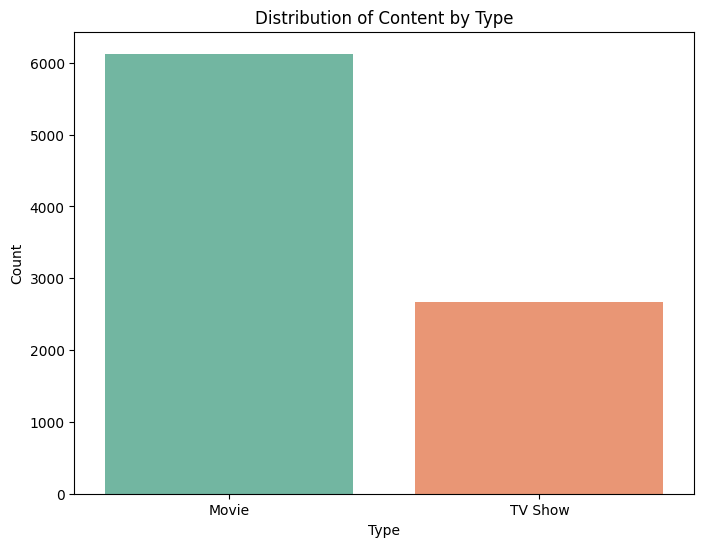

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Most Common Genres
df['genres'] = df['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

/tmp/ipython-input-850128197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')


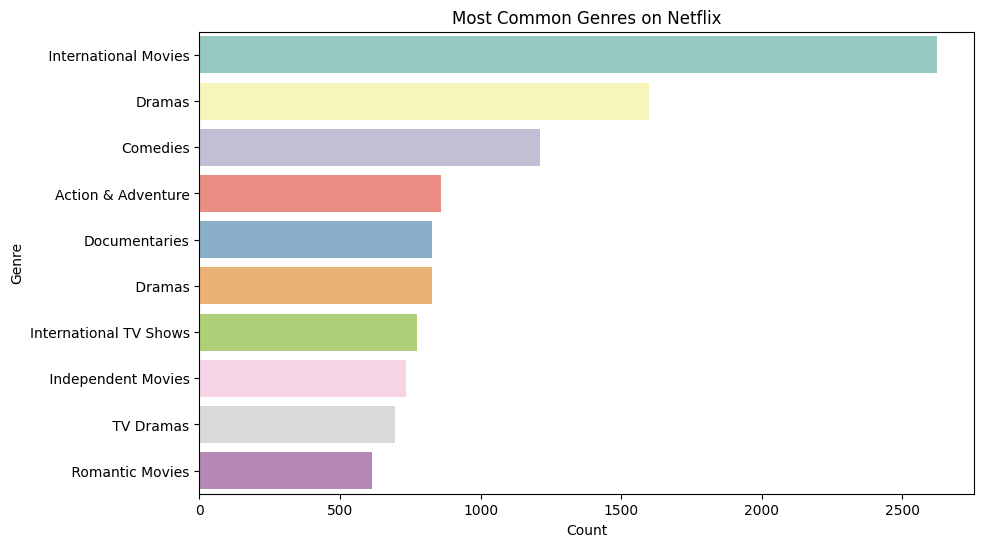

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [ ]:
# Content Added Over Time
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

/tmp/ipython-input-1671514436.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, palette='coolwarm')


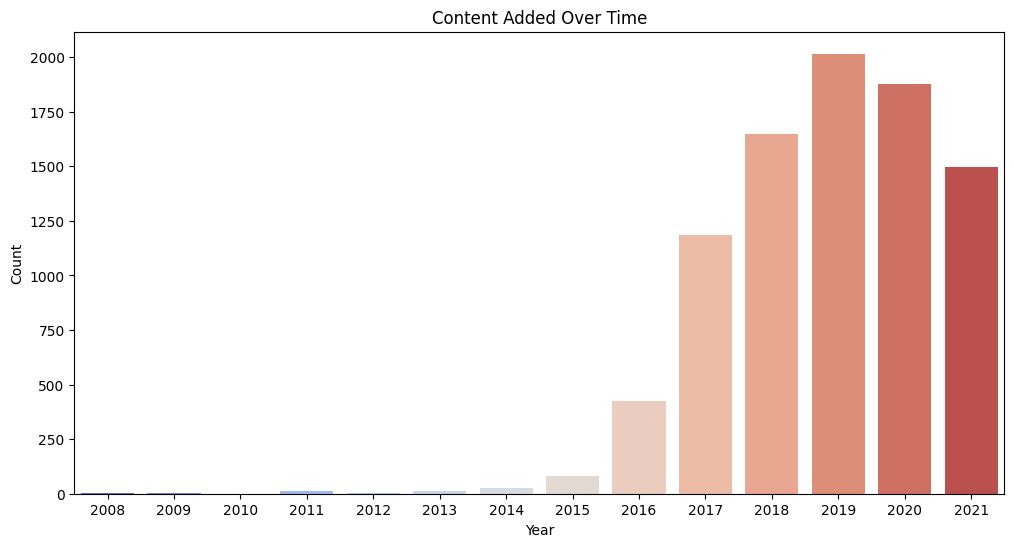

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
# Top 10 Directors with the Most Titles
top_directors = df['director'].value_counts().head(10)

/tmp/ipython-input-3593002378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


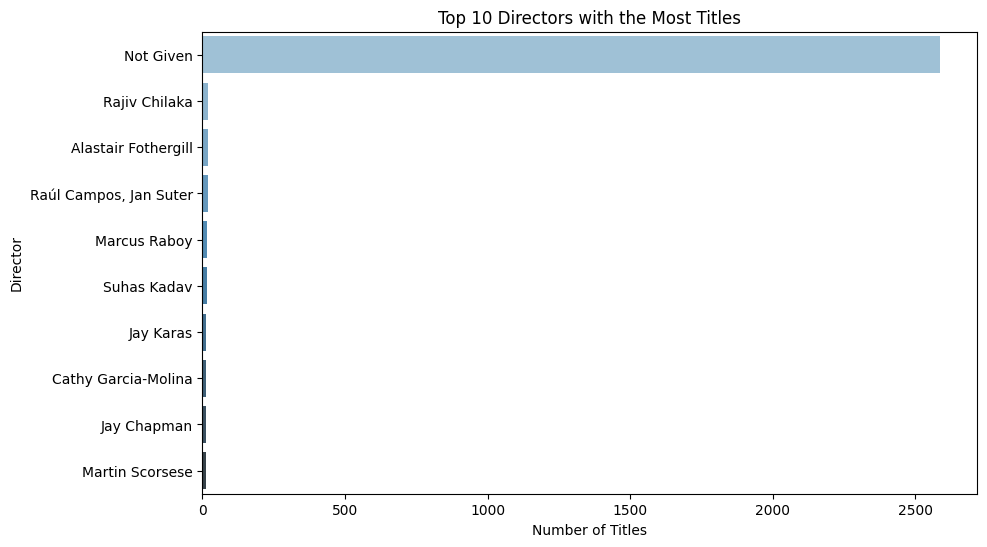

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

In [ ]:
# Word Cloud of Movie Titles
movie_titles = df[df['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400,background_color='black').generate(' '.join(movie_titles))

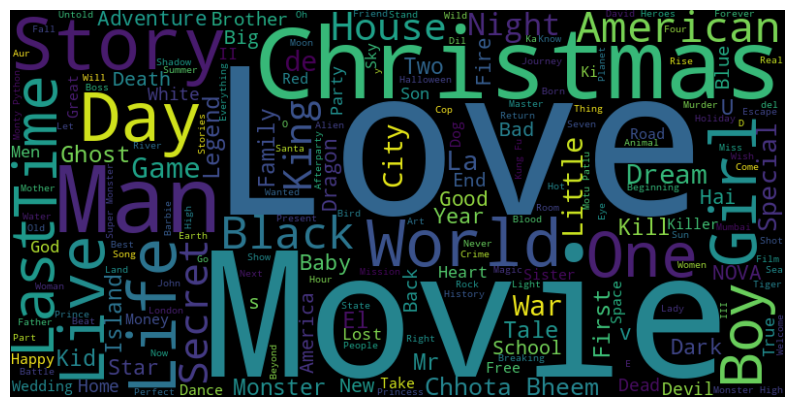

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Machine Learning

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
df = df[['type', 'release_year', 'duration']].dropna()

In [25]:
df['duration_minutes'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [26]:
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

In [27]:
X = df[['release_year', 'duration_minutes']]
y = df['type_encoded']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [33]:
acc_score = accuracy_score(y_test, y_pred)

In [35]:
print(f'Accuracy: {acc_score*100}%')

Accuracy: 99.65870307167235%


In [40]:
new_data = pd.DataFrame({
    'release_year': [2022],
    'duration_minutes': [95]
})

prediction = model.predict(new_data)
print(prediction)

[0]


In [41]:
result = le.inverse_transform(prediction)
print("Predicted type:", result[0])

Predicted type: Movie
